# Should Illinois Home Builders & Renovators Install Solar Panels?
This research project intends to provide both home builders and renovators in the state of Illinois with statistical analysis of the economic impact of building homes with solar panel systems, or adding solar panels to existing homes on the market. This does not cover energy cost savings over time, and instead focuses on the sale of the home itself.

## Import Packages

In [241]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import random
import pickle
import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")

## Data Source
Below can be found two Pandas dataframes unpickled from the Data Preprocessing notebook in this repository. The data was obtained via a paid subscription of the MRED MLS system; a large database of housing market data used by real estate agents and appraisers.

In [242]:
with_df = pd.read_pickle("./with_df.pkl")
without_df = pd.read_pickle("./witho_df.pkl")
population_df = with_df.append(without_df, ignore_index=True)

## Data Shape
The two previously mentioned dataframes are re-merged together to form the population of homes sold between 100k and 1M US dollars over the span of the last 24 months. They are also seperated into homes with solar panel systems (new and existing), and those without.

In [243]:
print(with_df.shape)
print(without_df.shape)
print(population_df.shape)

(57, 9)
(2996, 9)
(3053, 9)


In [244]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3053 entries, 0 to 3052
Data columns (total 9 columns):
City              3053 non-null object
Green Features    76 non-null object
List Price        3053 non-null int64
MLS #             3053 non-null int64
MT                3052 non-null float64
New               3053 non-null int64
Remarks           3031 non-null object
SP:OLP            3053 non-null float64
Sold Pr           3053 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 214.8+ KB


In [245]:
population_df.describe()

,List Price,MLS #,MT,New,SP:OLP,Sold Pr
count,3.053000e+03,3.053000e+03,3052.000000,3053.00000,3053.000000,3053.000000
mean,3.374966e+05,9.721064e+06,228.329292,0.06813,0.963171,323531.651818
std,2.006459e+05,1.806264e+05,213.240028,0.25201,0.055471,188486.775733
min,7.500000e+04,8.281264e+06,1.000000,0.00000,0.313283,100000.000000
25%,1.979000e+05,9.680683e+06,106.000000,0.00000,0.944255,189000.000000
50%,2.799000e+05,9.717455e+06,186.000000,0.00000,0.967812,272000.000000
75%,4.149000e+05,9.778879e+06,286.000000,0.00000,0.990766,400000.000000
max,1.995000e+06,1.057340e+07,3568.000000,1.00000,1.392670,1000000.000000


In [246]:
population_df.head(1)

,City,Green Features,List Price,MLS #,MT,New,Remarks,SP:OLP,Sold Pr
0,Champaign,NaN,129900,9639898,319.0,0,Wonderful home on double lot in south Champaig...,0.95458,124000


$$ -------------------------------------------------- $$

## Hypothesis 1: Homes with solar panel systems have a higher average value than homes in general.
This first test is to compare the average sale price of a subset of new and existing home sales that have solar panel systems, with the average sale price of home sales in general.

$$\large H_0\text{:   }\bar{x} \leq \mu$$
$$\large H_a\text{:   }\bar{x} > \mu$$

In [247]:
#population mean, var, and std
pop_mean = round(population_df['Sold Pr'].mean(), ndigits=2)
pop_var = round(population_df['Sold Pr'].var(), ndigits=2)
pop_std = round(population_df['Sold Pr'].std(), ndigits=2)

In [248]:
print(f'Population Mean: {pop_mean}')
print(f'Population Variance: {pop_var}')
print(f'Population Standard Deviation: {pop_std}')

Population Mean: 323531.65
Population Variance: 35527264626.19
Population Standard Deviation: 188486.78


In [249]:
#population mean, var, and std
sol_mean = round(with_df['Sold Pr'].mean(), ndigits=2)
sol_var = round(with_df['Sold Pr'].var(), ndigits=2)
sol_std = round(with_df['Sold Pr'].std(), ndigits=2)

In [250]:
print(f'Solar Mean: {sol_mean}')
print(f'Solar Variance: {sol_var}')
print(f'Solar Standard Deviation: {sol_std}')

Solar Mean: 417916.28
Solar Variance: 45801253328.96
Solar Standard Deviation: 214012.27


### Right Tail Z-Test

In [251]:
z = (sol_mean-pop_mean)/(pop_std/np.sqrt(57))
print(f'Z Score: {z}')

Z Score: 3.780574583184501


In [252]:
p_value = 1 - stats.norm.cdf(z)
alpha = 0.05
print(f'P Value: {p_value}')

P Value: 7.823341836732389e-05


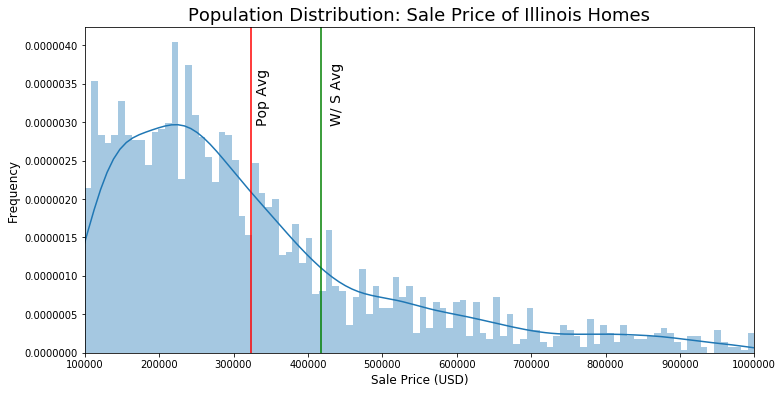

In [253]:
plt.subplots(figsize=(12,6))
sns.distplot(population_df['Sold Pr'], bins=100)
plt.axvline(x=pop_mean, color='red')
plt.axvline(x=sol_mean, color='green')
plt.title("Population Distribution: Sale Price of Illinois Homes", fontsize=18)
plt.xlabel('Sale Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.text(430000, .000003, s='W/ S Avg', fontsize=14, rotation=90)
plt.text(330000, .000003, s='Pop Avg', fontsize=14, rotation=90)
plt.xlim(population_df['Sold Pr'].min(), population_df['Sold Pr'].max())
plt.plot()
plt.show()


### Sampling Distribution / CLT
While the Z Score and P Value above seem to be sufficient to reject our null hypothesis, because of the type of distribution of data, we use CLT and create a sampling distribution to further confirm our findings.

In [254]:
sample_means = []
for _ in range(1000):
    sample_means.append(round(np.random.choice(population_df['Sold Pr'], size=57).mean(), ndigits=2))

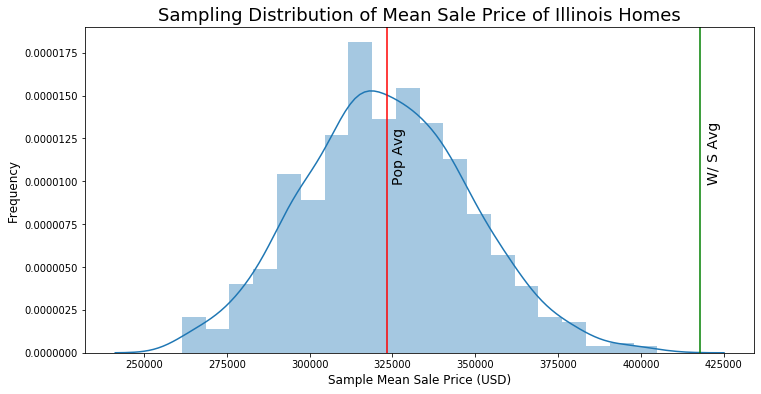

In [255]:
plt.subplots(figsize=(12,6))
sns.distplot(sample_means, bins=20)
plt.axvline(x=np.mean(sample_means), color='red')
plt.axvline(x=sol_mean, color='green')
plt.title("Sampling Distribution of Mean Sale Price of Illinois Homes", fontsize=18)
plt.xlabel('Sample Mean Sale Price (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.text(420000, .00001, s='W/ S Avg', fontsize=14, rotation=90)
plt.text(325000, .00001, s='Pop Avg', fontsize=14, rotation=90)
plt.plot()
plt.show()

## Conclusion: Reject Null Hypothesis
Based on the findings above, we can definitively reject our null hypothesis. It is clear that homes with solar panels sell for a significantly higher average selling price than homes without.

This does not imply that adding solar panels increases the value of your home. To make this claim, we would need to take into account the dozens of other variables that impact a home's sale price, and use more sophisticated models to isolate solar panels as a feature.

The findings make sense, because solar panel systems are expensive, and so home owners who can afford them likely have a more valuable home to begin with.

$$ -------------------------------------------------- $$

## Hypothesis 2: Existing homes with solar panel systems are sold faster than existing homes in general.
The second test is to compare the average market time, in days, of existing homes with solar panels to existing homes in general.

$$\large H_0\text{:   }\bar{x} \geq \mu$$
$$\large H_a\text{:   }\bar{x} < \mu$$

In this test, we will remove outliers in the market time category by limiting our days on market to 1 year, or 365 days.

In [256]:
#removing outliers from Market Time; any times greater than 365 days/1 year.
population_df2 = population_df[(population_df['MT'] < 365) & (population_df['New'] == 0)]
population_df2.shape

(2440, 9)

In [257]:
#removing outliers from Market Time; any times greater than 365 days/1 year.
with_df2 = with_df[(with_df['MT'] < 365) & (with_df['New'] == 0)]
with_df2.shape

(46, 9)

In [258]:
#population mean, var, and std
pop2_mean = round(population_df2['MT'].mean(), ndigits=2)
pop2_var = round(population_df2['MT'].var(), ndigits=2)
pop2_std = round(population_df2['MT'].std(), ndigits=2)

In [259]:
print(f'Population Mean: {pop2_mean}')
print(f'Population Variance: {pop2_var}')
print(f'Population Standard Deviation: {pop2_std}')

Population Mean: 164.35
Population Variance: 8967.74
Population Standard Deviation: 94.7


In [260]:
#population mean, var, and std
sol2_mean = round(with_df2['MT'].mean(), ndigits=2)
sol2_var = round(with_df2['MT'].var(), ndigits=2)
sol2_std = round(with_df2['MT'].std(), ndigits=2)

In [261]:
print(f'Solar Mean: {sol2_mean}')
print(f'Solar Variance: {sol2_var}')
print(f'Solar Standard Deviation: {sol2_std}')

Solar Mean: 82.52
Solar Variance: 6306.52
Solar Standard Deviation: 79.41


### Left Tail Z-Test

In [262]:
z2 = (sol2_mean-pop2_mean)/(pop2_std/np.sqrt(46))
print(f'Z Score: {z2}')

Z Score: -5.860592001258085


In [263]:
p_value2 = stats.norm.cdf(z2)
alpha2 = 0.05
print(f'P Value: {p_value2}')

P Value: 2.30609959005168e-09


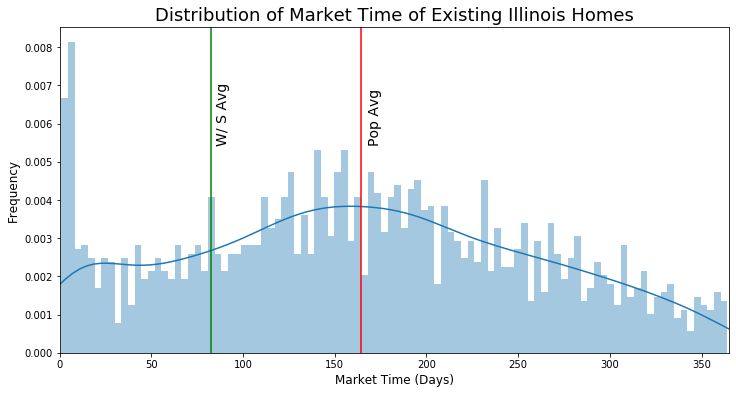

In [264]:
plt.subplots(figsize=(12,6))
sns.distplot(population_df2['MT'], bins=100)
plt.axvline(x=pop2_mean, color='red')
plt.axvline(x=sol2_mean, color='green')
plt.title("Distribution of Market Time of Existing Illinois Homes", fontsize=18)
plt.xlabel('Market Time (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.text(85, .0055, s='W/ S Avg', fontsize=14, rotation=90)
plt.text(168, .0055, s='Pop Avg', fontsize=14, rotation=90)
plt.xlim(0, 365)
plt.plot()
plt.show()

### Sampling Distribution / CLT
While the Z Score and P Value above seem to be sufficient to reject our null hypothesis, because of the type of distribution of data, we use CLT and create a sampling distribution to further confirm our findings.

In [265]:
sample_means2 = []
for _ in range(1000):
    sample_means2.append(round(np.random.choice(population_df2['MT'], size=46).mean(), ndigits=2))

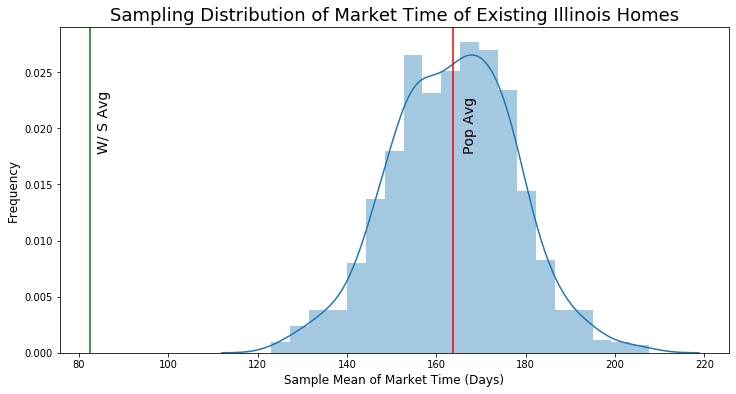

In [266]:
plt.subplots(figsize=(12,6))
sns.distplot(sample_means2, bins=20)
plt.axvline(x=np.mean(sample_means2), color='red')
plt.axvline(x=sol2_mean, color='green')
plt.title("Sampling Distribution of Market Time of Existing Illinois Homes", fontsize=18)
plt.xlabel('Sample Mean of Market Time (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.text(84, .018, s='W/ S Avg', fontsize=14, rotation=90)
plt.text(166, .018, s='Pop Avg', fontsize=14, rotation=90)
plt.plot()
plt.show()

## Conclusion: Reject Null Hypothesis
Based on the findings above, we can definitively reject our null hypothesis. It is clear that existing homes with solar panels sell much faster on average than existing homes without.

This implies that if you need to sell your home fast, and you have the cash, installing solar panels could drastically reduce the market time of your sale.

$$ -------------------------------------------------- $$

## Hypothesis 3: New construction homes with solar panel systems spend less time on the market than new construction homes without.
The second test is to compare the average market time, in days, of new homes with solar panels to new homes without. 

$$\large H_0\text{:   }\bar{x}_{w} \geq \bar{x}_{wo}$$
$$\large H_a\text{:   }\bar{x}_{w} < \bar{x}_{wo}$$

In [267]:
#removing outliers from Market Time; any times greater than 365 days/1 year.
without_df3 = without_df[(without_df['MT'] < 365) & (without_df['New'] == 1)]
without_df3.shape

(155, 9)

In [268]:
#removing outliers from Market Time; any times greater than 365 days/1 year.
with_df3 = with_df[(with_df['MT'] < 365) & (with_df['New'] == 1)]
with_df3.shape

(9, 9)

In [269]:
#population mean, var, and std
wo3_mean = round(without_df3['MT'].mean(), ndigits=2)
wo3_var = round(without_df3['MT'].var(), ndigits=2)
wo3_std = round(without_df3['MT'].std(), ndigits=2)

In [270]:
print(f'Without Solar Mean: {wo3_mean}')
print(f'Without Solar Variance: {wo3_var}')
print(f'Without Solar Standard Deviation: {wo3_std}')

Without Solar Mean: 154.83
Without Solar Variance: 11897.62
Without Solar Standard Deviation: 109.08


In [271]:
#population mean, var, and std
w3_mean = round(with_df3['MT'].mean(), ndigits=2)
w3_var = round(with_df3['MT'].var(), ndigits=2)
w3_std = round(with_df3['MT'].std(), ndigits=2)

In [272]:
print(f'Solar Mean: {w3_mean}')
print(f'Solar Variance: {w3_var}')
print(f'Solar Standard Deviation: {w3_std}')

Solar Mean: 71.56
Solar Variance: 12821.53
Solar Standard Deviation: 113.23


### Left Tail Two Sample T-Test
Due to the small size of one of our samaples, we use a two sample T-test to get a more appropriate test statistic and p value.

In [273]:
x_1 = wo3_mean
x_2 = w3_mean
s_1_2 = wo3_var
s_2_2 = w3_var
n_1 = len(without_df3)
n_2 = len(with_df3)
s_p_2 = ((n_1 - 1)*s_1_2 + (n_2 - 1)* s_2_2)/(n_1 + n_2 -2)

t = ((x_2 - x_1)/np.sqrt(s_p_2*(1/n_1 + 1/n_2)))
print(f'T Score: {t}')

T Score: -2.222248237284552


In [274]:
ttest_ind(without_df3['MT'], with_df3['MT'], equal_var = True)

Ttest_indResult(statistic=2.2224270279504847, pvalue=0.02763928017773139)

In [275]:
dgf = (n_2-1)+(n_1-1)
print(f'Degrees of Freedom: {dgf}')

Degrees of Freedom: 162


In [276]:
tcrit = stats.t.ppf(1-.95, dgf)
print(f'T Critical: {tcrit}')

T Critical: -1.6543139565251865


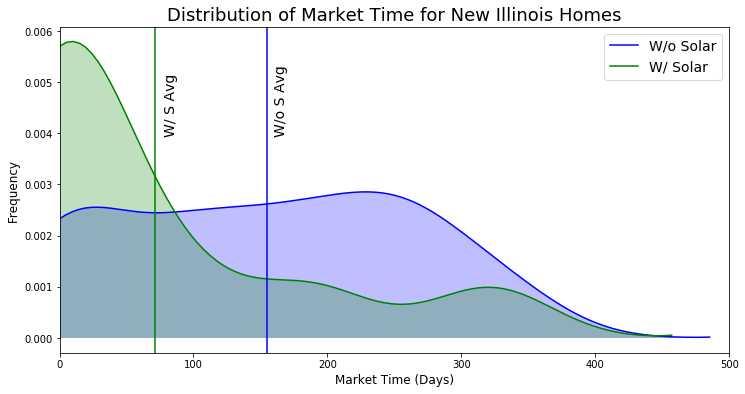

In [277]:
plt.subplots(figsize=(12,6))
sns.kdeplot(without_df3['MT'], color='blue', shade=True)
sns.kdeplot(with_df3['MT'], color='green', shade=True)
plt.axvline(x=wo3_mean, color='blue')
plt.axvline(x=w3_mean, color='green')
plt.title("Distribution of Market Time for New Illinois Homes", fontsize=18)
plt.xlabel('Market Time (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.text(78, .004, s='W/ S Avg', fontsize=14, rotation=90)
plt.text(160, .004, s='W/o S Avg', fontsize=14, rotation=90)
plt.legend(['W/o Solar', 'W/ Solar'], fontsize=14)
plt.xlim(0, 500)
plt.plot()
plt.show()

## Conclusion: Reject Null Hypothesis
Based on the findings above, we can definitively reject our null hypothesis. It is clear that new construction homes with solar panels sell much faster on average than new homes without.

Market time is a far more important metric for real estate developers due to the upfront costs of building a home from scratch.

This implies that a good strategy for developers who want to increase the demand for their homes would be adding solar panels.

$$ -------------------------------------------------- $$

## Hypothesis 4: Homes with solar panel systems have a final sale price closer to the original listing price when compared to homes in general.
The third test explores the theory that a home with solar panels captures a higher percentage of the original list price when finally sold (sale price).

$$\large H_0\text{:   }\bar{x} \leq \mu$$
$$\large H_a\text{:   }\bar{x} > \mu$$

In [278]:
#removing outliers from SP:OLP; any values outside 50-250%
population_df4 = population_df[(population_df['SP:OLP'] > .7) & (population_df['SP:OLP'] < 1.3)]
population_df4.shape

(3037, 9)

In [279]:
#removing outliers from SP:OLP; any values outside 50-250%
with_df4 = with_df[(with_df['SP:OLP'] > .7) & (with_df['SP:OLP'] < 1.3)]
with_df4.shape

(57, 9)

In [280]:
#population mean, var, and std
pop4_mean = round(population_df4['SP:OLP'].mean(), ndigits=4)
pop4_var = round(population_df4['SP:OLP'].var(), ndigits=4)
pop4_std = round(population_df4['SP:OLP'].std(), ndigits=4)

In [281]:
print(f'Population Mean: {pop4_mean}')
print(f'Population Variance: {pop4_var}')
print(f'Population Standard Deviation: {pop4_std}')

Population Mean: 0.964
Population Variance: 0.0024
Population Standard Deviation: 0.0487


In [282]:
#population mean, var, and std
sol4_mean = round(with_df4['SP:OLP'].mean(), ndigits=4)
sol4_var = round(with_df4['SP:OLP'].var(), ndigits=4)
sol4_std = round(with_df4['SP:OLP'].std(), ndigits=4)

In [283]:
print(f'Solar Mean: {sol4_mean}')
print(f'Solar Variance: {sol4_var}')
print(f'Solar Standard Deviation: {sol4_std}')

Solar Mean: 0.9788
Solar Variance: 0.0011
Solar Standard Deviation: 0.0335


### Right Tailed Z-Test

In [284]:
z4 = (sol4_mean-pop4_mean)/(pop4_std/np.sqrt(57))
print(f'Z Score: {z4}')

Z Score: 2.294405536796866


In [285]:
p_value4 = 1 - stats.norm.cdf(z4)
alpha4 = 0.05
print(f'P Value: {p_value4}')

P Value: 0.010883607711595689


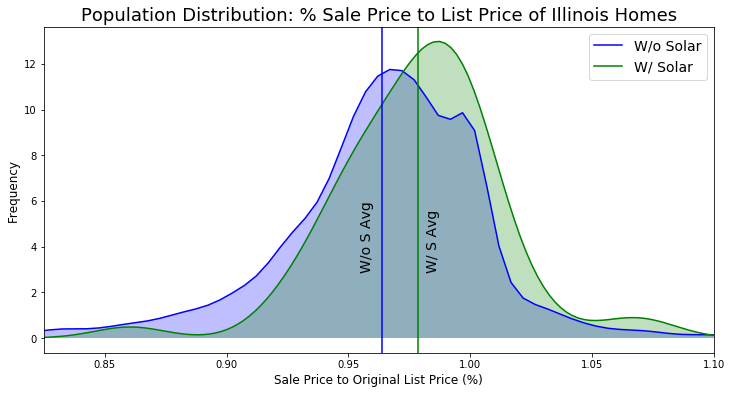

In [286]:
plt.subplots(figsize=(12,6))
sns.kdeplot(population_df4['SP:OLP'], color='blue', shade=True)
sns.kdeplot(with_df4['SP:OLP'], color='green', shade=True)
plt.axvline(x=pop4_mean, color='blue')
plt.axvline(x=sol4_mean, color='green')
plt.title("Population Distribution: % Sale Price to List Price of Illinois Homes", fontsize=18)
plt.xlabel('Sale Price to Original List Price (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.text(.982, 3, s='W/ S Avg', fontsize=14, rotation=90)
plt.text(.955, 3, s='W/o S Avg', fontsize=14, rotation=90)
plt.legend(['W/o Solar', 'W/ Solar'], fontsize=14)
plt.xlim(0.825, 1.1)
plt.plot()
plt.show()

### Effect Size
Based on the above analysis, it seems we can reject our null hypothesis. However, it is also clear that there is likely a smaller effect size. We calculate Cohen's D below to quantify this effect size.

In [287]:
def cohen_d(group1, group2):

    diff = group1.mean() - group2.mean()

    n1 = len(group1)
    n2 = len(group2)
    var1 = group1.var()
    var2 = group2.var()
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)

    return d

grp1 = population_df4['SP:OLP']
grp2 = with_df4['SP:OLP']
print(f'Cohen\'s D: {cohen_d(grp2, grp1)}')

Cohen's D: 0.30389118097076434


## Conclusion: Reject Null Hypothesis, Small Effect Size
Based on the findings above, we can our reject our null hypothesis, but the effect size, calculated by Cohen's D, is small (0.3).

Homes with solar panels avg a slightly higher Sale Price to Original List Price ratio when compared to homes without.

No recommendations can be made on this due to the small effect size.

$$ -------------------------------------------------- $$

# Final Recommendations
* H1: Homes w/ solar panels have a higher average sale price, but there are too other many factors that impact home value.
* H2: For flippers you can add solar panels to sell your home faster, and avoid losing profit from longer market times.
* H3: For residential developers, you can add solar panels to your new homes to increase demand and lower market time.
* H4: The SP:OLP ratio is higher for homes with solar panels, however, the effect size is small.